# Terra's Instagram Likes Report
__By Terra Marie__

This report was created to furthur analyze my instagram activity. I am focusing on this to understand what content I enjoy the most and how it effects my behavior on social media.

I accessed this data through Instagram's request page, which is specific to each individual's personal Instargram account. This request page can be found within your Instagram settings.

To begin, I needed to load in the Python 3 libraries that I will use to load in files, convert data, and analyze data.

### Importing Libraries

In [14]:
from matplotlib import pyplot as plt
import json
from datetime import datetime as dt
import seaborn
import pandas as pd


Next, I will load in the data and print the length of the data that I will be analyzing.

### Reading & Understanding the Data

In [2]:
with open(r'/Users/terra/Downloads/Spring Semester/EMAT/Instagram Data/terramarie34_20210203/likes/liked_posts.json') as l:
    likes = json.load(l)

In [3]:
likes.keys()

dict_keys(['likes_media_likes'])

In [5]:
type(likes['likes_media_likes'])

list

In [4]:
print(len(likes['likes_media_likes']))

15307


The next step is to look at how the data is sturctured and break it up so that I can determine how to analyze it.

In [6]:
likes['likes_media_likes'][0]

{'title': 'qveenherby',
 'media_list_data': [],
 'string_list_data': [{'href': '',
   'value': 'ð\x9f\x91\x8d',
   'timestamp': 1571103648}]}

In [7]:
likes['likes_media_likes'][0]['title']

'qveenherby'

In [9]:
likes['likes_media_likes'][0]['string_list_data'][0]['timestamp']

1571103648

In [10]:
accounts = [x['title'] for x in likes['likes_media_likes']]
accounts[:10]

['qveenherby',
 'iamcardib',
 'katie.jo.shank',
 'sarahhhrae',
 'kitaddams',
 'megan_bowen_',
 'spicydogmemes',
 'tiamowry',
 'records',
 'unsquidables']

In [11]:
timestamp = [x['string_list_data'][0]['timestamp'] for x in likes['likes_media_likes']]
timestamp[:10]

[1571103648,
 1571103613,
 1571103573,
 1571103570,
 1571102806,
 1571005790,
 1570978075,
 1570978061,
 1570978057,
 1570978008]

_Printing the length of the data not only provides useful information to understanding my activity on Istagram, but it also gives me a clearer look at what I am working with and how to best display the data._

In [12]:
print(len(accounts), len(timestamp))

15307 15307


I can use the Panda library to display the last five accounts that I liked and when I liked them.

The data as it comes is difficult to read for anyone who is not a computer. So, I can use Datetime library to humanize the data and make it more understandable.

In [15]:
likes_df = pd.DataFrame({'accounts': accounts, 'timestamp': timestamp})
likes_df.head()

,accounts,timestamp
0,qveenherby,1571103648
1,iamcardib,1571103613
2,katie.jo.shank,1571103573
3,sarahhhrae,1571103570
4,kitaddams,1571102806


In [34]:
# a_date = dt.utcfromtimestamp(likes['likes_media_likes'][0]['timestamp'])
# a_date

### Grouping the content

These are a couple of ways I could group the content. As seen when reading the data, timestamp is when I liked a post on an account, meaning it is also how many times I liked that account. 

When grouping the timestamps by accounts. We can see the top 5 accounts that I liked the most.

In [27]:
count_likes = likes_df.groupby('accounts').count()
count_likes[:10]

,timestamp
accounts,
00finater,1
0fficial.feelings,1
0g.spamss,1
2000schildhoodtweets,45
2021withmirah,1
215cane_,1
21ninety,1
247tricks,1
2freaking_noodles,4


In [35]:
count_likes.sort_values('timestamp' ,ascending=False).head()

,timestamp
accounts,
advice,625
nocap,557
funnyhoodvidz,526
kevonstage,342
lovelyti2002,213


### Displaying the Data

Lastly, we want to vissually see the point of the report: which accounts did I like the most? In order to see this, I need to finally display the data.

The first way I could display the data could be a line chart.

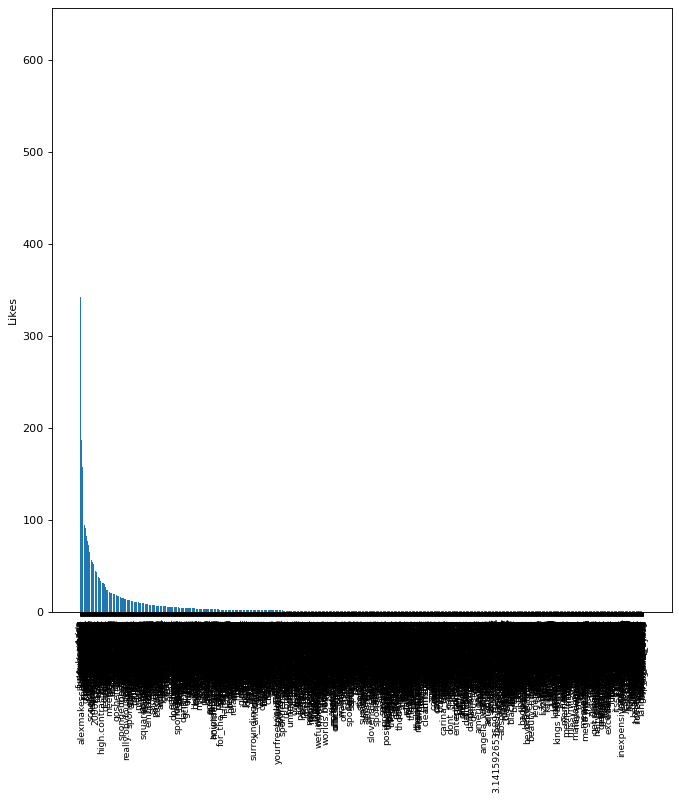

In [38]:
sortcount = count_likes.sort_values('timestamp' ,ascending=False)
labels = sortcount['timestamp'].keys()
vals = sortcount['timestamp']
width = .75

fig, ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax.bar(labels, vals, width)
ax.set_ylabel('Likes')
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

However, this data is hard to read. So, displaying the data as a pie chart will be easiest way to see which account I liked the most on Instagram.

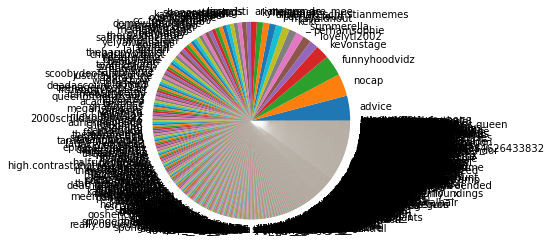

In [69]:
vals = piedat['timestamp']
labels = piedat['timestamp'].keys()


fig3, ax3 = plt.subplots()
ax3.pie(vals, labels = labels)
ax3.axis('equal')
plt.show()

In [75]:
toplikes = count_likes['timestamp'] > 200
countstop, countsbot = sortcount[toplikes], sortcount[-toplikes]
other = countsbot.sum()

piedat = countstop.append(pd.DataFrame(other['timestamp'], columns = ['timestamp'], index = ['other < 200']))


<ipython-input-75-f1c8311b60e5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  countstop, countsbot = sortcount[toplikes], sortcount[-toplikes]


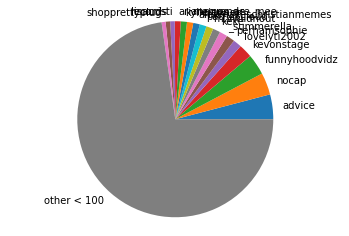

In [74]:
vals = piedat['timestamp']
labels = piedat['timestamp'].keys()


fig3, ax3 = plt.subplots()
ax3.pie(vals, labels = labels)
ax3.axis('equal')
plt.show()

### In conclusion

Terra really likes content from the account titled Advice. Beyond this assessment, there is more to be found within this data.